In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
from matplotlib import pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from IPython.display import display, HTML
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.neural_network import MLPRegressor

In [2]:
# %pip install xgboost

In [3]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

### Analysis the DataBase

In [4]:
df=pd.read_csv("train.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

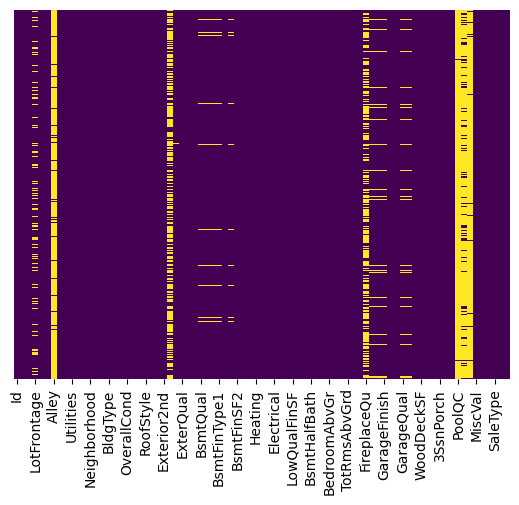

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

C:\Users\Mchomak\AppData\Local\Temp\ipykernel_11440\4004821029.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

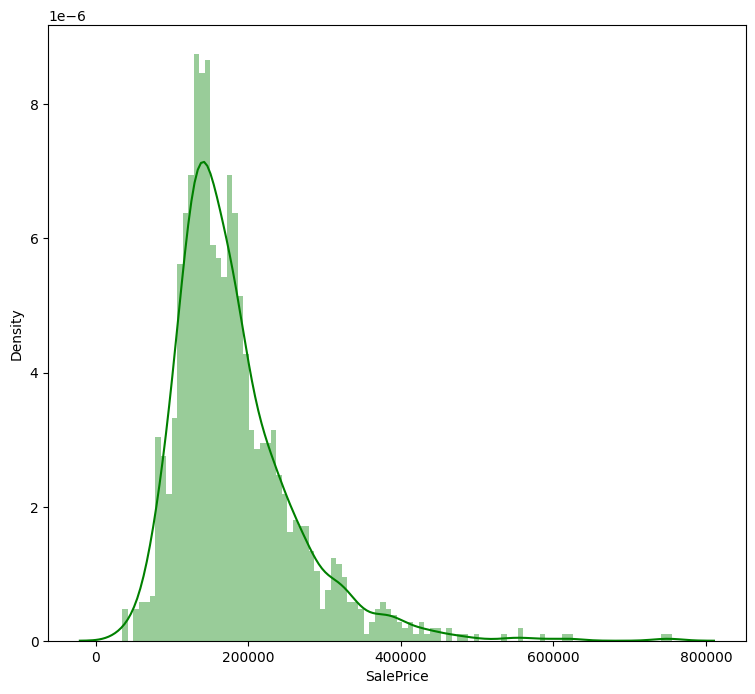

In [8]:
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [9]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

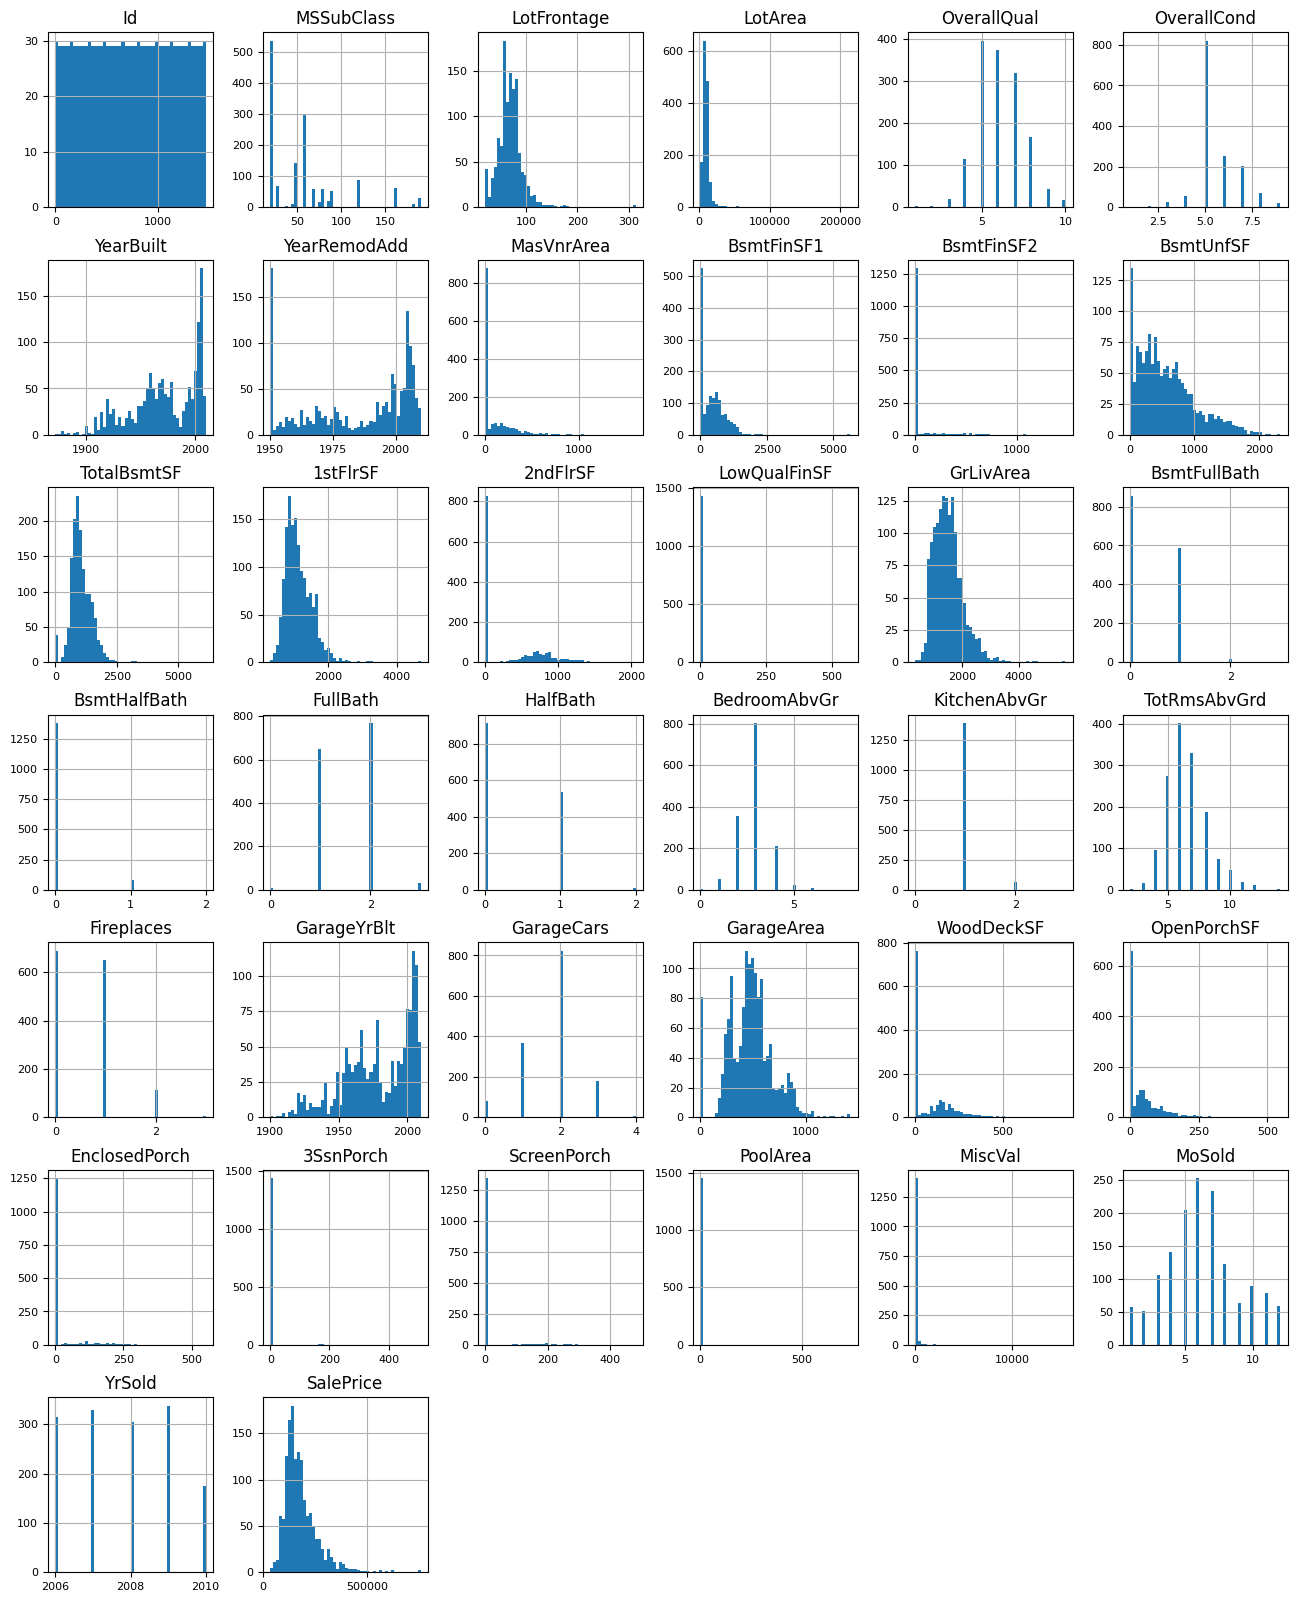

In [10]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Beautiful diagrams

In [11]:
# 1. Distribution of dwelling types and their relation to sale prices
dwelling_types = df['BldgType'].value_counts()
dwelling_prices = df.groupby('BldgType')['SalePrice'].mean()

# Format labels for the second graph
formatted_dwelling_prices = ['$' + f'{value:,.2f}' for value in dwelling_prices.values]

# Create bar charts
fig1 = go.Figure(data=[go.Bar(
    x=dwelling_types.index,
    y=dwelling_types.values,
    marker_color='rgb(76, 175, 80)',
    text=dwelling_types.values,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig1.update_layout(
    title='Distribution of Building Types',
    xaxis_title='Building Type',
    yaxis_title='Count',
    plot_bgcolor='rgba(34, 34, 34, 1)',
    paper_bgcolor='rgba(34, 34, 34, 1)',
    font=dict(color='white')
)

fig2 = go.Figure(data=[go.Bar(
    x=dwelling_prices.index,
    y=dwelling_prices.values,
    marker_color='rgb(156, 39, 176)',
    text=formatted_dwelling_prices,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig2.update_layout(
    title='Average Sale Price by Building Type',
    xaxis_title='Building Type',
    yaxis_title='Price',
    plot_bgcolor='rgba(34, 34, 34, 1)',
    paper_bgcolor='rgba(34, 34, 34, 1)',
    font=dict(color='white')
)

# Show the figures
fig1.show()
fig2.show()

In [12]:
# 2. Zoning impact on sale price
zoning_prices = df.groupby('MSZoning')['SalePrice'].mean()
fig3 = px.bar(x=zoning_prices.index, y=zoning_prices.values, title='Average Sale Price by Zoning',
              color_discrete_sequence=['purple', 'green'], text=zoning_prices.values,
              template='plotly_dark')

fig3.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig3.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig3.update_xaxes(title='Zoning')
fig3.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig3.show()

In [13]:
# 3. Street and alley access types effect on sale price
street_prices = df.groupby('Street')['SalePrice'].mean()
alley_prices = df.groupby('Alley')['SalePrice'].mean()

# Street Prices
colors_street = np.where(street_prices.index == 'Pave', 'purple', 'green')
fig5 = px.bar(x=street_prices.index, y=street_prices.values, title='Average Sale Price by Street Type',
              template='plotly_dark', text=street_prices.values,
              color=colors_street, color_discrete_sequence=['green', 'purple'])

fig5.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig5.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig5.update_xaxes(title='Street Type')
fig5.update_layout(showlegend=False)

# Alley Prices
colors_alley = np.where(alley_prices.index == 'Pave', 'purple', 'green')
fig6 = px.bar(x=alley_prices.index, y=alley_prices.values, title='Average Sale Price by Alley Type',
              template='plotly_dark', text=alley_prices.values,
              color=colors_alley, color_discrete_sequence=['green', 'purple'])

fig6.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig6.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig6.update_xaxes(title='Alley Type')
fig6.update_layout(showlegend=False)

fig5.show()
fig6.show()

In [14]:
# 4. Average sale price by property shape
colors = px.colors.qualitative.Plotly

shape_prices = df.groupby('LotShape')['SalePrice'].mean()
contour_prices = df.groupby('LandContour')['SalePrice'].mean()
# Shape Prices
fig7 = px.bar(x=shape_prices.index, y=shape_prices.values, title='Average Sale Price by Property Shape',
              template='plotly_dark', text=shape_prices.values)

fig7.update_traces(marker_color=colors, texttemplate='$%{text:,.0f}', textposition='outside')
fig7.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig7.update_xaxes(title='Property Shape')
fig7.update_layout(showlegend=False)

# Contour Prices
fig8 = px.bar(x=contour_prices.index, y=contour_prices.values, title='Average Sale Price by Property Contour',
              template='plotly_dark', text=contour_prices.values)

fig8.update_traces(marker_color=colors, texttemplate='$%{text:,.0f}', textposition='outside')
fig8.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig8.update_xaxes(title='Property Contour')
fig8.update_layout(showlegend=False)

fig7.show()
fig8.show()

In [15]:
# 5. Calculate Property Age
df['PropertyAge'] = df['YrSold'] - df['YearBuilt']

# Calculate Correlation between Property Age and Sale Price
age_price_corr = df['PropertyAge'].corr(df['SalePrice'])
print(f'Correlation between Property Age and Sale Price: {age_price_corr}')

# Create a scatter plot to visualize the relationship between Property Age and Sale Price
fig9 = px.scatter(df, x='PropertyAge', y='SalePrice', title='Property Age vs Sale Price', color='PropertyAge', color_continuous_scale=px.colors.sequential.Purp)

fig9.update_layout(plot_bgcolor='rgb(30,30,30)', paper_bgcolor='rgb(30,30,30)', font=dict(color='white'))

fig9.show()

Correlation between Property Age and Sale Price: -0.5233504175468159


In [16]:
# 6. Calculate Correlation between Living Area and Sale Price
living_area_price_corr = df['GrLivArea'].corr(df['SalePrice'])
print(f'Correlation between Living Area (above grade) and Sale Price: {living_area_price_corr}')

# Create a scatter plot to visualize the relationship between Living Area and Sale Price
fig10 = px.scatter(df, x='GrLivArea', y='SalePrice', title='Living Area (above grade) vs Sale Price', color='GrLivArea', color_continuous_scale=px.colors.sequential.Purp)

fig10.update_layout(plot_bgcolor='rgb(30,30,30)', paper_bgcolor='rgb(30,30,30)', font=dict(color='white'))

fig10.show()

Correlation between Living Area (above grade) and Sale Price: 0.7086244776126521


### Preprocessing

In [17]:
# for numerical data columns use mean score
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# for categorial data columns fill in empty values "missing"
# OneHotEncoder split categorial data columns into columns with Boolean values (0, 1)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

In [18]:
# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
# remainder = 'passthrough' columns were are not specified will be passed
# remainder = 'drop' columns were are not specified will be delete
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

# Apply the pipeline to your dataset
X = df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice']) #normalize dependent variable 
X_preprocessed = pipeline.fit_transform(X)

c:\Users\Mchomak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [19]:
X_train, X_test, y_train, y_test= train_test_split(X_preprocessed, y, test_size=0.2, random_state=123)
print(len(X_train), len(X_test))

1168 292


In [20]:
# Define the models
models = {
    # 'LinearRegression': LinearRegression(),
    # 'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    # 'LinearRegression': {},
    # 'RandomForest': {
    #     'n_estimators': [100, 200, 500],
    #     'max_depth': [None, 10, 30],
    #     'min_samples_split': [2, 5, 10],
    # },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

In [21]:
# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.1337410660893465



In [22]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Create an MLPRegressor instance
mlp = MLPRegressor(random_state=42,max_iter=10000, n_iter_no_change = 3,learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10,10), (10,10,10), (25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp.fit(X_train_scaled, y_train)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'solver': 'adam'}
Test score:  0.19024451594761466


In [23]:
pca = PCA()
X_pca_pre = pca.fit_transform(X_preprocessed)

# PCA use for reduction data columns and get major information
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
pipeline_pca = Pipeline(steps=
                        [('preprocessor', preprocessor),
                        ('pca', pca)])

X_pca = pipeline_pca.fit_transform(X)

c:\Users\Mchomak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [24]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=123)

# # Train and tune the models
# grids_pca = {}
# for model_name, model in models.items():
#     #print(f'Training and tuning {model_name}...')
#     grids_pca[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
#     grids_pca[model_name].fit(X_train_pca, y_train_pca)
#     best_params = grids_pca[model_name].best_params_
#     best_score = np.sqrt(-1 * grids_pca[model_name].best_score_)
    
#     print(f'Best parameters for {model_name}: {best_params}')
#     print(f'Best RMSE for {model_name}: {best_score}\n')

In [25]:
X_train_scaled_pca = X_train_pca.copy()
X_test_scaled_pca = X_test_pca.copy()

grid_search_mlp_pca = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

grid_search_mlp_pca.fit(X_train_scaled_pca, y_train)

print("Best parameters found: ", grid_search_mlp_pca.best_params_)

best_score = np.sqrt(-1 * grid_search_mlp_pca.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Test score:  0.41493327111364237


In [26]:
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids[i].predict(X_test), y_test))))

XGBoost: 0.10868828927298053


In [27]:
# for i in grids.keys():
#     print (i + ': ' + str(np.sqrt(mean_squared_error(grids_pca[i].predict(X_test_pca), y_test))))

In [28]:
print( str(np.sqrt(mean_squared_error(grid_search_mlp.predict(X_test_scaled),y_test))))
print( str(np.sqrt(mean_squared_error(grid_search_mlp_pca.predict(X_test_scaled_pca),y_test))))


0.15204645134227276
0.28208104309040194


In [29]:
def custom_features(df):
    df_out = df.copy()
    df_out['PropertyAge'] = df_out['YrSold'] - df_out['YearBuilt']
    df_out['TotalSF'] = df_out['TotalBsmtSF'] + df_out['1stFlrSF'] + df_out['2ndFlrSF']
    df_out['TotalBath'] = df_out['FullBath'] + 0.5 * df_out['HalfBath'] + df_out['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    df_out['HasRemodeled'] = (df_out['YearRemodAdd'] != df_out['YearBuilt']).astype(object)
    df_out['Has2ndFloor'] = (df_out['2ndFlrSF'] > 0).astype(object)
    df_out['HasGarage'] = (df_out['GarageArea'] > 0).astype(object)
    df_out['YrSold_cat'] = df_out['YrSold'].astype(object)
    df_out['MoSold_cat'] = df_out['MoSold'].astype(object)
    df_out['YearBuilt_cat'] = df_out['YearBuilt'].astype(object)
    df_out['MSSubClass_cat'] = df_out['MSSubClass'].astype(object)
    
    return df_out

feature_engineering_transformer = FunctionTransformer(custom_features)

In [30]:
# Identify categorical and numerical columns
new_cols_categorical = pd.Index(['HasRemodeled', 'Has2ndFloor', 'HasGarage'])
new_cols_numeric = pd.Index(['PropertyAge', 'TotalSF', 'TotalBath', 'YrSold_cat', 'MoSold_cat', 'YearBuilt_cat', 'MSSubClass_cat'])

# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.append(new_cols_categorical)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.append(new_cols_numeric)

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline_fe = Pipeline(steps=[
    ('fe', feature_engineering_transformer),
    ('preprocessor', preprocessor),
    ('pca', pca)])

# Apply the pipeline to your dataset
X = df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice'])
X_preprocessed_fe = pipeline_fe.fit_transform(X)

c:\Users\Mchomak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [31]:
# Split the data into training and testing sets
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_preprocessed_fe, y, test_size=0.2, random_state=42)

# Train and tune the models
grids_fe = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_fe[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids_fe[model_name].fit(X_train_fe, y_train_fe)
    best_params = grids_fe[model_name].best_params_
    best_score = np.sqrt(-1 * grids_fe[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.13776268697274208



In [32]:
df_test = pd.read_csv('test.csv')

In [33]:
df_test_preprocessed = pipeline_fe.transform(df_test)

In [34]:
#xgboost submission
y_xgboost = np.exp(grids_fe['XGBoost'].predict(df_test_preprocessed))

df_xgboost_out = df_test[['Id']].copy()
df_xgboost_out['SalePrice'] = y_xgboost

df_xgboost_out.to_csv('submission.csv', index=False)